# Assignment-1: Nearest Neighbours & KMeans


# Q1.Use pandas to get some insights into the data


In [2]:
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"

In [4]:
df = pd.read_csv(url)

In [5]:
# Explore the first few rows of the dataset
print(df.head())


   Unnamed: 0      Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  \
0           1  1177.698      2           7        2            2         2   
1           2  2134.800      5           7        4            2         2   
2           3  1138.560      5           7        2            2         1   
3           4  1458.780      2           7        3            2         2   
4           5   967.776     11          14        3            2         2   

   Price  
0  62000  
1  78000  
2  58000  
3  45000  
4  45000  


In [6]:
# Check for missing values
print(df.isnull().sum())


Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64


In [7]:
# Summary statistics of the dataset
print(df.describe())


       Unnamed: 0         Sqft       Floor  TotalFloor     Bedroom  \
count  645.000000   645.000000  645.000000  645.000000  645.000000   
mean   325.159690  1527.656260    5.939535   10.855814    2.837209   
std    187.312152   767.386531    3.884721    4.996208    1.010740   
min      1.000000   359.358000    1.000000    1.000000    1.000000   
25%    164.000000   925.080000    3.000000    7.000000    2.000000   
50%    326.000000  1423.200000    5.000000   12.000000    3.000000   
75%    487.000000  1892.856000    8.000000   14.000000    4.000000   
max    648.000000  5856.468000   22.000000   38.000000    7.000000   

       Living.Room    Bathroom          Price  
count   645.000000  645.000000     645.000000  
mean      1.813953    1.810853   61986.823256  
std       0.462364    0.683574   35635.091007  
min       0.000000    0.000000    6100.000000  
25%       2.000000    1.000000   39000.000000  
50%       2.000000    2.000000   50000.000000  
75%       2.000000    2.000000   

In [8]:
# Count unique values in each column
print(df.nunique())


Unnamed: 0     645
Sqft           288
Floor           21
TotalFloor      25
Bedroom          7
Living.Room      5
Bathroom         6
Price          153
dtype: int64


In [9]:
# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)


             Unnamed: 0      Sqft     Floor  TotalFloor   Bedroom  \
Unnamed: 0     1.000000 -0.065182 -0.021299   -0.039687 -0.008638   
Sqft          -0.065182  1.000000  0.143249    0.304515  0.615608   
Floor         -0.021299  0.143249  1.000000    0.564221  0.023986   
TotalFloor    -0.039687  0.304515  0.564221    1.000000  0.067298   
Bedroom       -0.008638  0.615608  0.023986    0.067298  1.000000   
Living.Room   -0.027035  0.455940 -0.023563    0.029373  0.526532   
Bathroom      -0.007877  0.728869  0.099772    0.146132  0.643083   
Price         -0.077512  0.825514  0.244553    0.333631  0.467059   

             Living.Room  Bathroom     Price  
Unnamed: 0     -0.027035 -0.007877 -0.077512  
Sqft            0.455940  0.728869  0.825514  
Floor          -0.023563  0.099772  0.244553  
TotalFloor      0.029373  0.146132  0.333631  
Bedroom         0.526532  0.643083  0.467059  
Living.Room     1.000000  0.546826  0.328788  
Bathroom        0.546826  1.000000  0.605542  
Pr

# Q2.Show some interesting visualization of the data


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Visualization of the distribution of prices


In [11]:
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Price', ylabel='Count'>

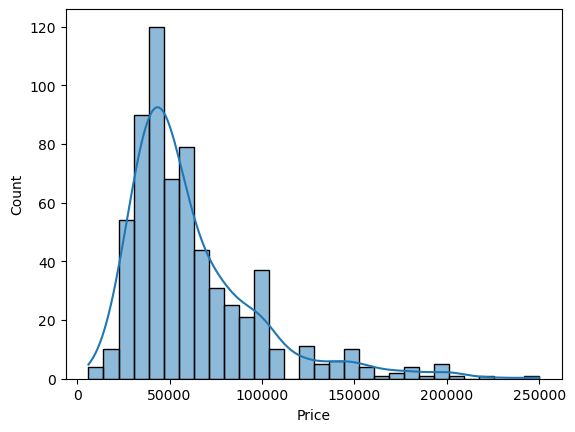

In [12]:
sns.histplot(df['Price'], kde=True)


Text(0.5, 1.0, 'Price Distribution')

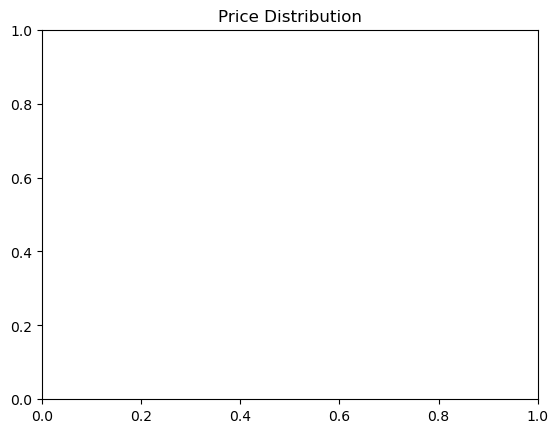

In [13]:
plt.title('Price Distribution')


Text(0.5, 0, 'Price')

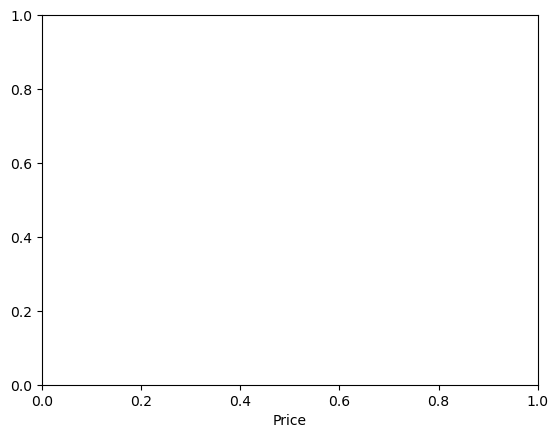

In [14]:
plt.xlabel('Price')


Text(0, 0.5, 'Frequency')

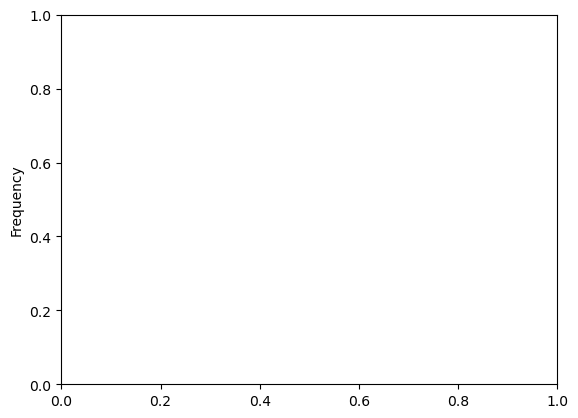

In [15]:
plt.ylabel('Frequency')


In [17]:
plt.show()


In [ ]:
# Correlation heatmap


In [18]:
plt.figure(figsize=(10, 8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: >

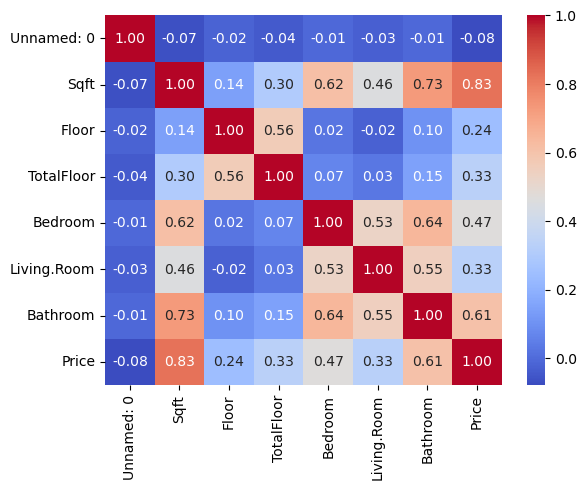

In [19]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')


Text(0.5, 1.0, 'Correlation Heatmap')

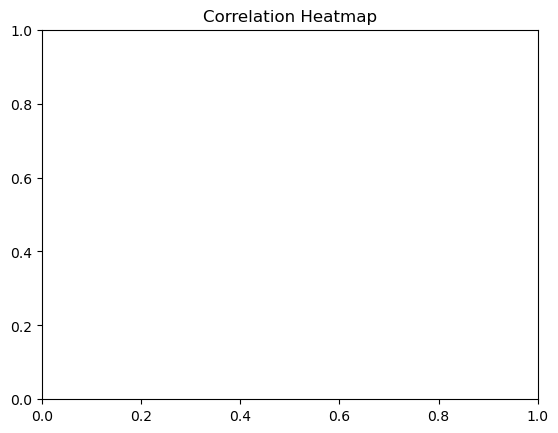

In [20]:
plt.title('Correlation Heatmap')


In [21]:
plt.show()


In [ ]:
# Scatter plot of Price vs. Sqft


In [22]:
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Sqft', ylabel='Price'>

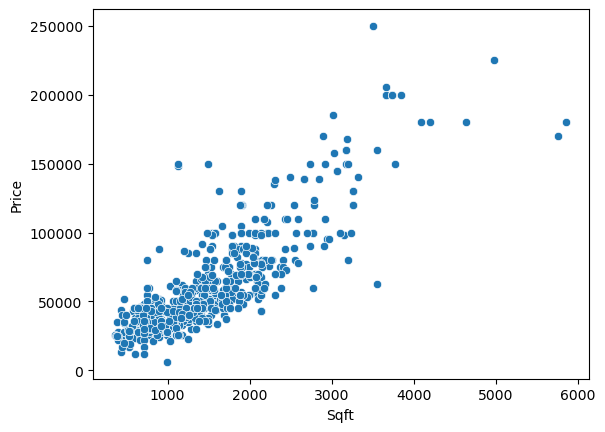

In [23]:
sns.scatterplot(x='Sqft', y='Price', data=df)


Text(0.5, 1.0, 'Price vs. Sqft')

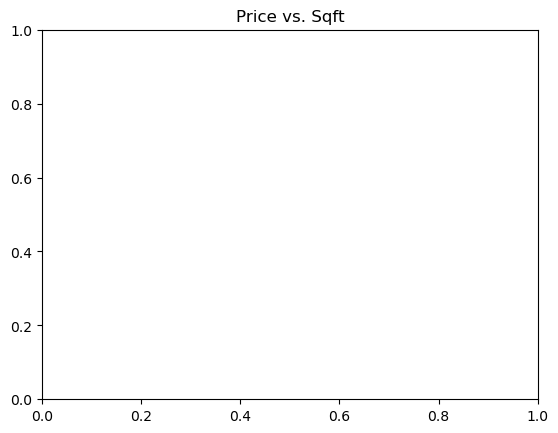

In [24]:
plt.title('Price vs. Sqft')


Text(0.5, 0, 'Sqft')

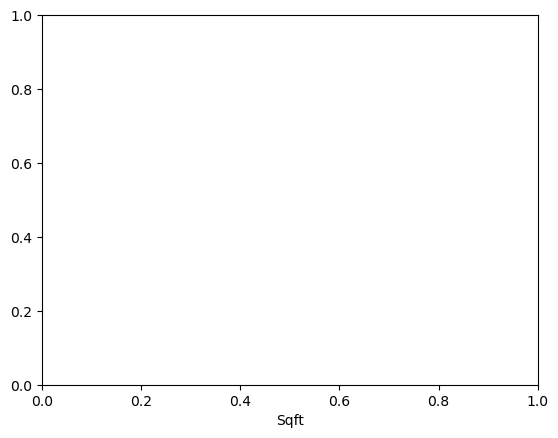

In [25]:
plt.xlabel('Sqft')


Text(0, 0.5, 'Price')

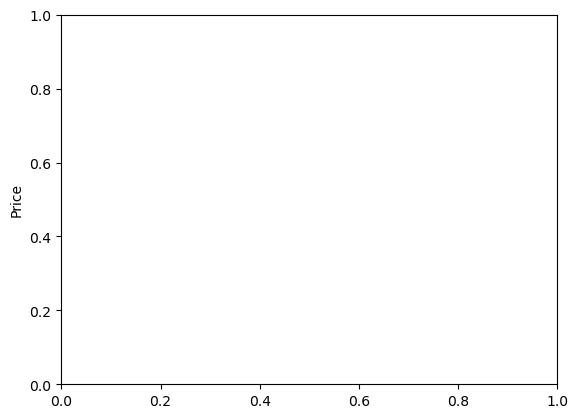

In [26]:
plt.ylabel('Price')


In [27]:
plt.show()


# Q3.Manage data for training & testing


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [31]:
X = df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']]
y = df['Price']


In [ ]:
# Split data into training and testing sets (80% train, 20% test)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features


In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Q4.Finding a better value of k


In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


In [41]:
knn_regressor = KNeighborsRegressor()


In [ ]:
# Define a range of K values to try


In [42]:
k_values = range(1, 21)


In [ ]:
# Cross-validation to find the best K value


In [49]:
mae_scores = []

for k in k_values:
    knn_regressor.n_neighbors = k
    scores = cross_val_score(knn_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
    mae_scores.append(-scores.mean())


In [50]:
# Plot the K values against the mean absolute error


In [51]:
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

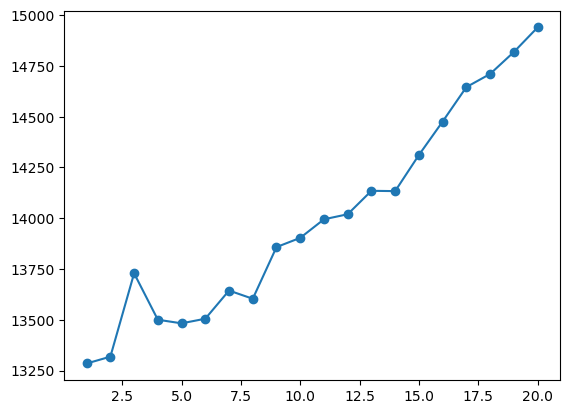

In [52]:
plt.plot(k_values, mae_scores, marker='o')


Text(0.5, 1.0, 'KNN Regression: K vs. Mean Absolute Error')

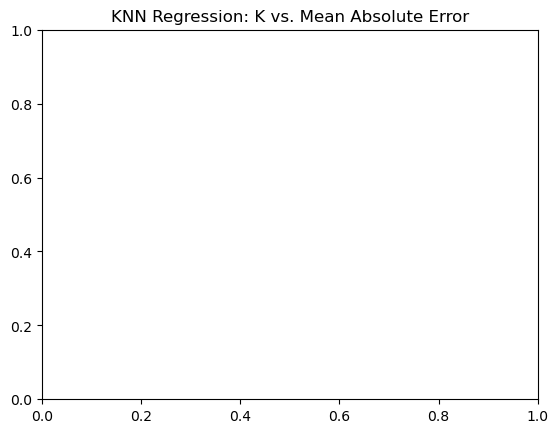

In [53]:
plt.title('KNN Regression: K vs. Mean Absolute Error')


Text(0.5, 0, 'K')

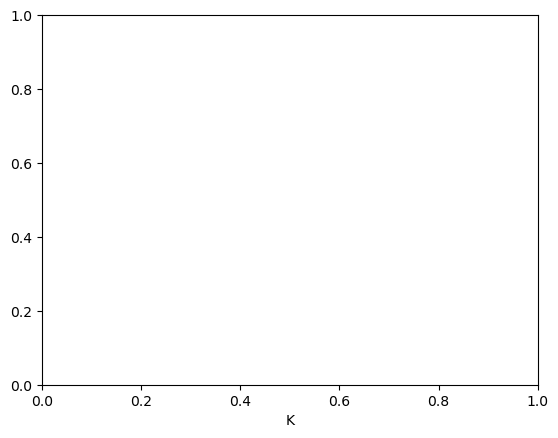

In [54]:
plt.xlabel('K')


Text(0, 0.5, 'Mean Absolute Error')

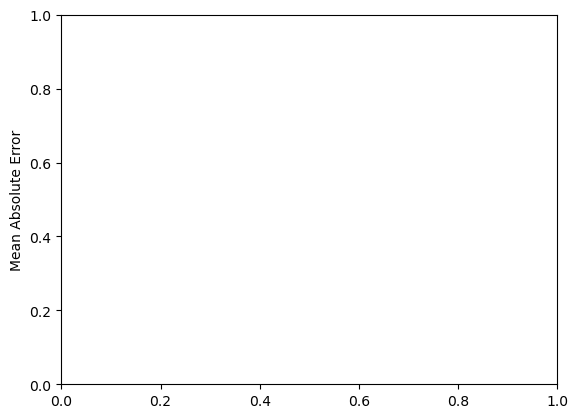

In [55]:
plt.ylabel('Mean Absolute Error')


([<matplotlib.axis.XTick at 0x1ff27d180d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

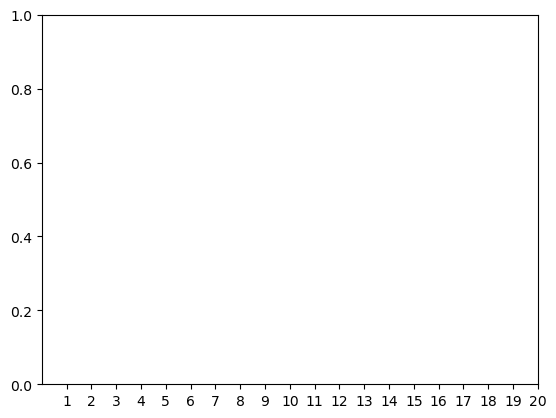

In [56]:
plt.xticks(k_values)


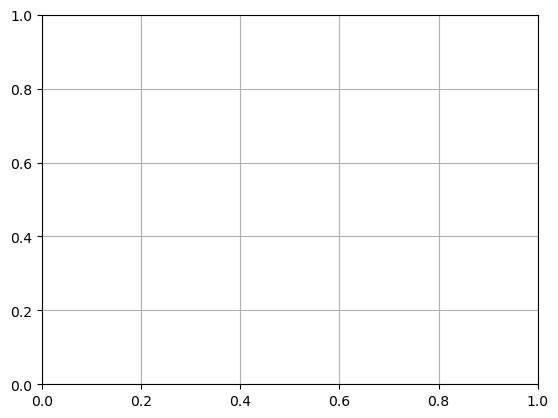

In [57]:
plt.grid(True)


In [58]:
plt.show()


In [ ]:
# Find the best K value


In [61]:
best_k = k_values[mae_scores.index(min(mae_scores))]
print(f"Best K value: {best_k}")


Best K value: 1
